# Demonstration of Kologorov Arnold Network (KAN)

In [1]:
import torch
from kan import KAN
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Generate data from $f(x_1, x_2, x_3, x_4) = \exp(\sin(x_1^2 + x_2) + \cos(x_3 + x_4^2))$ and train a KAN to approximate it.

In [2]:
sobol = torch.quasirandom.SobolEngine(dimension=3)
X = sobol.draw(10000)
f = lambda X: torch.exp(torch.sin(X[:,0]**2 + X[:,1]) + torch.cos(X[:,2]**2))
F = f(X).reshape(-1, 1)
X, F = X.to(device), F.to(device)

In [4]:
model = KAN([3, 2, 2, 1])
model.to(device)

checkpoint directory created: ./model
saving model version 0.0


MultKAN(
  (act_fun): ModuleList(
    (0-2): 3 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-2): 3 x Symbolic_KANLayer()
  )
)

In [5]:
optimizer = torch.optim.LBFGS(model.parameters())

In [6]:
pbar = tqdm(range(10000))
for i in pbar:
    optimizer.zero_grad()
    F_pred = model(X)
    loss = ((F_pred - F)**2).mean()
    loss.backward()
    optimizer.step(lambda: loss)
    pbar.set_description(f"loss: {loss.item()}")

    

loss: 3.194450619048439e-05:  11%|█▏        | 1132/10000 [01:36<12:32, 11.78it/s]


KeyboardInterrupt: 

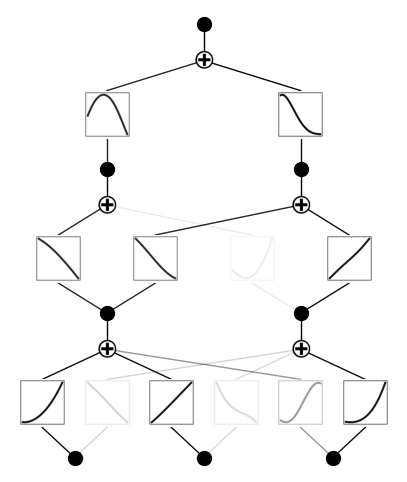

In [7]:
model.plot()